In [1]:
from qiskit import *
from qiskit.visualization import *
from math import pi, sqrt
import numpy as np

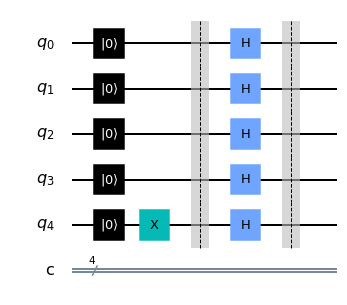

In [90]:
# n = int(input('Enter number of required qubits: '))
n = 4 

circuit = QuantumCircuit(n+1, n)    # Add one for ancillia qubit

circuit.reset(range(n+1))
circuit.x(n)
circuit.barrier()

circuit.h(range(n+1))
circuit.barrier()

circuit.draw('mpl')

13
1101


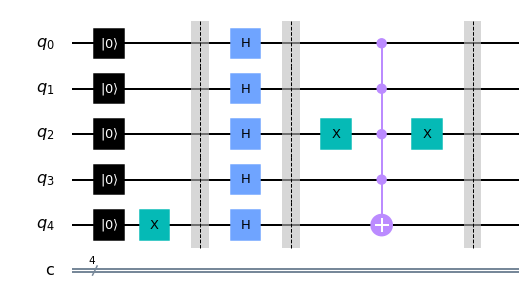

In [91]:
# target = int(input('Enter the target number: '))
target = 13
# max_n = 2**n
# target = np.random.randint(max_n)
print(target)

target_binary = "{0:04b}".format(target)
print(target_binary)

# Grover's Oracle
for index, value in enumerate(target_binary):  
    if value == '0':
        circuit.x(n-index)    # Adding X gate to the qubit with |0> value. Also the order of qubits is reversed in Qiskit.

control_qubits = [0, 1, 2, 3]
circuit.mct(control_qubits, n, n)
        
for index, value in enumerate(target_binary):  
    if value == '0':
        circuit.x(n-index)  
circuit.barrier()

circuit.draw('mpl')

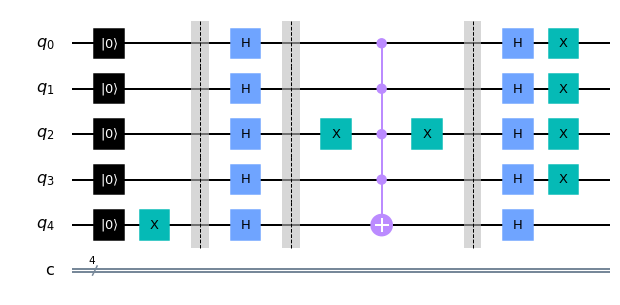

In [92]:
# Amplifier
circuit.h(range(n+1))
circuit.x(range(n))
# circuit.mcz([0, 1, 2], 3)

circuit.draw('mpl')

{'0000': 798, '0001': 8, '0010': 16, '0011': 13, '0100': 21, '0101': 16, '0110': 13, '0111': 18, '1000': 19, '1001': 11, '1010': 18, '1011': 18, '1100': 18, '1101': 16, '1110': 11, '1111': 10}


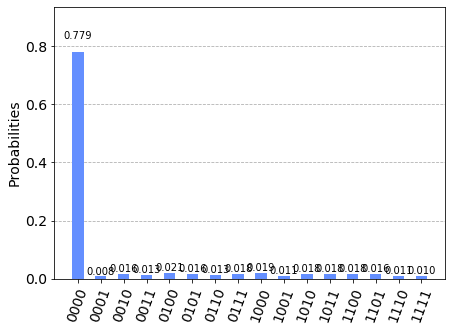

In [39]:
# backend = Aer.get_backend('qasm_simulator')
# results = execute(circuit, backend, shots = 1024).result()
# counts = results.get_counts()
# print(counts)
# plot_histogram(counts)

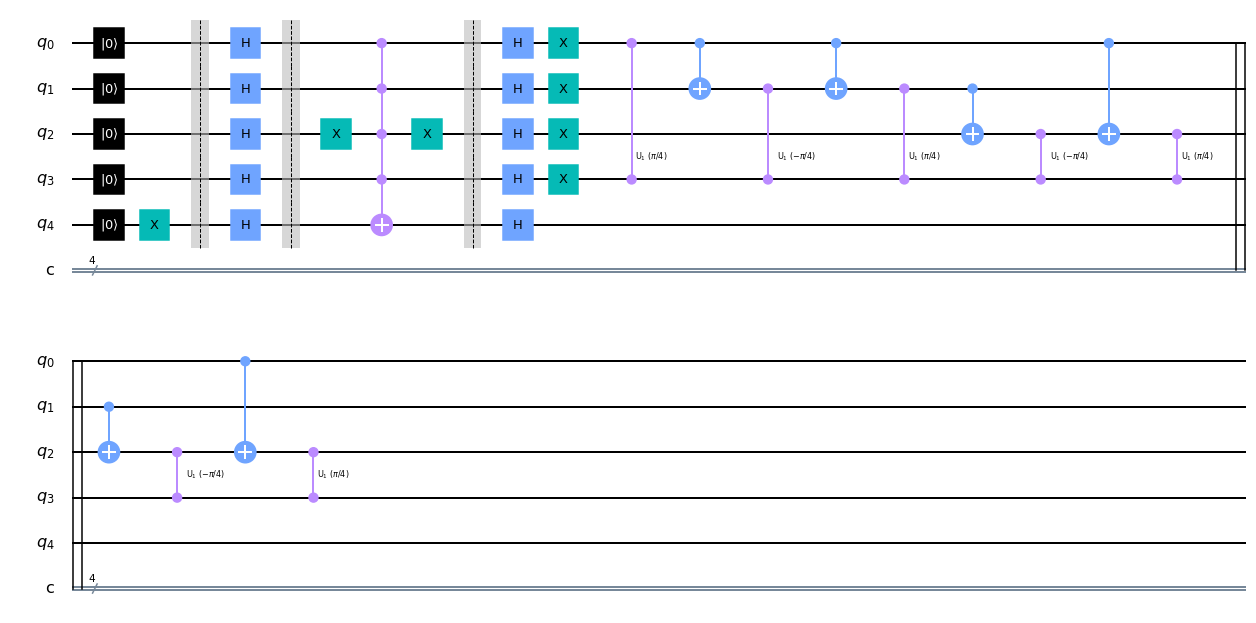

In [93]:
circuit.cu1(pi/4, 0, 3)

circuit.cx(0, 1)
circuit.cu1(-pi/4, 1, 3)
circuit.cx(0, 1)

circuit.cu1(pi/4, 1, 3)

circuit.cx(1, 2)
circuit.cu1(-pi/4, 2, 3)

circuit.cx(0, 2)
circuit.cu1(pi/4, 2, 3)

circuit.cx(1, 2)
circuit.cu1(-pi/4, 2, 3)


circuit.cx(0, 2)
circuit.cu1(pi/4, 2, 3)

circuit.draw('mpl')

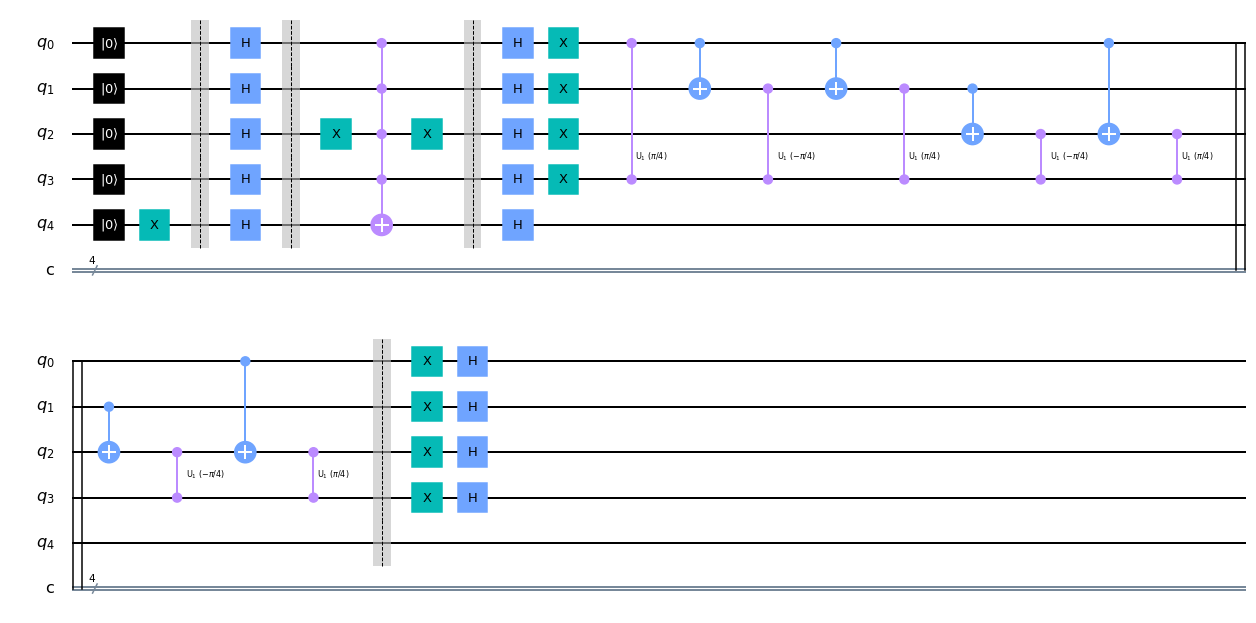

In [94]:
circuit.barrier()

circuit.x(range(n))
circuit.h(range(n))

circuit.draw('mpl')

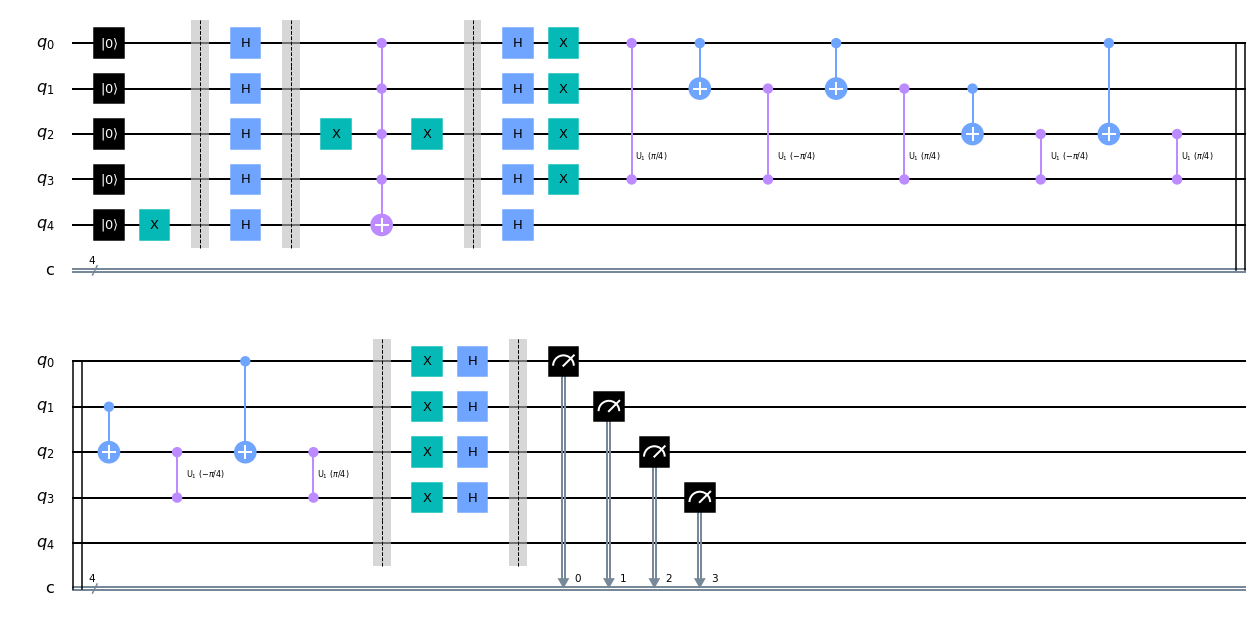

In [95]:
circuit.barrier()
circuit.measure(range(n), range(n))

circuit.draw('mpl')

{'0000': 35, '0001': 29, '0010': 26, '0011': 41, '0100': 32, '0101': 32, '0110': 32, '0111': 26, '1000': 27, '1001': 44, '1010': 26, '1011': 521, '1100': 41, '1101': 37, '1110': 35, '1111': 40}


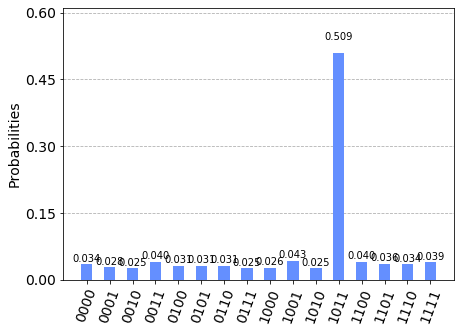

In [78]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

In [79]:
# from qiskit.providers.ibmq import least_busy
# from qiskit import IBMQ
# from qiskit.tools.monitor import job_monitor

# provider = IBMQ.load_account()
# backend = provider.backends(simulator = False)
# qcomp = least_busy(backend)
# job = execute(circuit, qcomp)
# print('Using the least busy device: ', qcomp.name())
# job_monitor(job)

/home/saasha/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


TranspilerError: 'Number of qubits (5) in circuit111 is greater than maximum (1) in the coupling_map'

In [96]:
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
backend = provider.backends(simulator = False)
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, qcomp)
job_monitor(job)

/home/saasha/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-26 17:33:21,252: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has been cancelled


In [97]:
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

IBMQJobInvalidStateError: 'Unable to retrieve result for job 5f96bb11834560001307003d. Job was cancelled.'